## Machine Learning Iris Flower Data Set Project

***

Author: Emma Dunleavy

Student Number: g00425660

Module Machine Learning & Statictics Winter 2023/24 

Lecturer: Ian McLoughlin
***

 The project is to create a notebook exploring classification algorithms applied on the iris flower data set associated with Ronald
A Fisher.5
- Explain what supervised learning is and then explain what classification algorithms are.
- Describe at least one common classification algorithm and implement it using the scikit-learn Python library.
- Throughout your notebook, use appropriate plots, mathematical notation, and diagrams to explain the relevant concepts.

***

### Required Libraries

In [30]:
# Graphs.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

import sklearn as sk
from sklearn import datasets

# Preprocessing.
import sklearn.preprocessing as pre

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Supervised Learning

According to [Taeho Jo](https://www.google.ie/books/edition/Machine_Learning_Foundations/0egdEAAAQBAJ?hl=en&gbpv=1&dq=supervised+learning&printsec=frontcover) "<i> machine learning is defined as the computation paradigm where the capacity for solving the given problem is built by previous examples...supervised learning is the learning paradigm where the parameters are optimized for minimizing the difference between the target output and the computed output.</i>"

Put more simply input data is used to train a model, and develop output labels which in turn are used to predict the classification of future data points. Providing existing knowledge allows the machine find patterns which are used to answer future questions asked about data in the same category. There are several steps and datasets required to delveop an unbiased model and it is important to ensure the datasets are kept seperate from each another.

The first dataset used is the "training dataset" which is the data used to fit the model. A "validation dataset" is held back from the training set and used to used to provide an unbiased evaluation of how well the model is performing, however once incoproated into the model the evaluation becomes more biased. The final dataset required is the "test dataset" which is used to provide an unbiased evaluation of a final model fit on the training dataset.

The figure below taken from ["Machine Learning Foundations"](https://www.google.ie/books/edition/Machine_Learning_Foundations/0egdEAAAQBAJ?hl=en&gbpv=1&dq=supervised+learning&printsec=frontcover) illustrates the flow of how a classification model is refined.

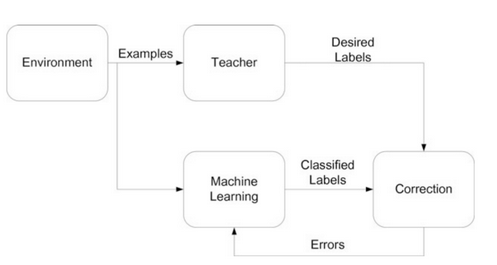




***

## Classification Algorithms

The four different types of classification tasks are:

    Binary Classification
    Multi-Class Classification
    Multi-Label Classification
    Imbalanced Classification

Some of the commonly used binary classification algorithms are:

    K-Nearest Neighbours
    Naive Bayes
    Decision Trees
    Support Vector Machines
    Logistic Regression

Classification algorithms use training data to predict the likelihood that subsequent data will fall into one of the predetermined categories. 


### Ronald A Fisher's Iris Dataset

In [2]:
# Load iris data.
df = pd.read_csv('data/iris.csv')

In [3]:
# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


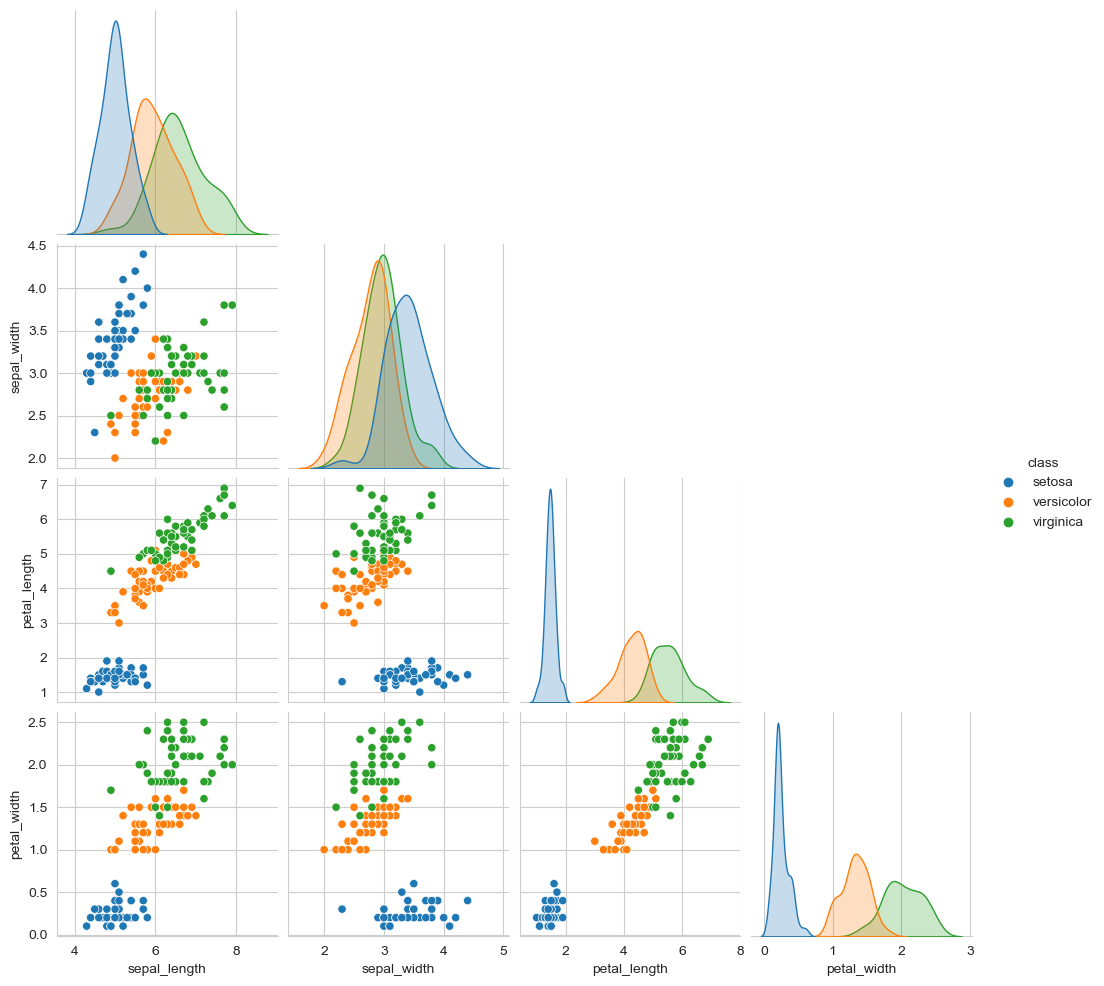

In [40]:
sns.pairplot(data=df, hue="class", corner=True)


### k-Nearest Neighbors

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

$$ \text {Euclidean Distance} = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$

Where:

- $ n  : \text{Number of dimensions}$

- $ x_i : \text{Coordinate of point } x \text{ in dimension } i $

- $ y_i : \text{Coordinate of point } y \text{ in dimension } i $



In [4]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

In [5]:
# The X values.
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Show.
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# Turn X into a numpy array.
X.to_numpy()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# y values.
y = df['class']

# Show.
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [8]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X, y)

KNeighborsClassifier()

In [10]:
# The first row of X.
X.iloc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [11]:
# Quick check that the classifier correctly predicts first X sample.
clf.predict(X.iloc[:1])

array(['setosa'], dtype=object)

In [12]:
y.iloc[0]

'setosa'

In [13]:
# Keep some samples back for testing, train on the others.
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y)

In [14]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
27,5.2,3.5,1.5,0.2
43,5.0,3.5,1.6,0.6
37,4.9,3.1,1.5,0.1
97,6.2,2.9,4.3,1.3
22,4.6,3.6,1.0,0.2
...,...,...,...,...
14,5.8,4.0,1.2,0.2
95,5.7,3.0,4.2,1.2
51,6.4,3.2,4.5,1.5
17,5.1,3.5,1.4,0.3


In [15]:
y_train

27        setosa
43        setosa
37        setosa
97    versicolor
22        setosa
         ...    
14        setosa
95    versicolor
51    versicolor
17        setosa
29        setosa
Name: class, Length: 112, dtype: object

In [16]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# Predict based on test set.
clf.predict(X_test)

array(['versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

In [18]:
# Proportion of correct classifications on test set.
(clf.predict(X_test) == y_test).sum() / X_test.shape[0]

0.9473684210526315

#### Cross Validation

In [19]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Run cross-validation with five folds.
sk.model_selection.cross_val_score(clf, X, y)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

### kNN Visualisation 

#### References

Iris – UCI Machine Learning Repository.
Aug. 17, 2023. url: https://archive.
ics . uci . edu / dataset / 53 / iris
(visited on 08/17/2023).

Jo, T. (2021). Machine Learning Foundations: Supervised, Unsupervised, and Advanced Learning. [online] Google Books. Springer Nature. Available at: https://www.google.ie/books/edition/Machine_Learning_Foundations/0egdEAAAQBAJ?hl=en&gbpv=1&dq=supervised+learning&printsec=frontcover [Accessed 31 Dec. 2023].

Majumdar, P. (2023). Mastering Classification Algorithms for Machine Learning: Learn how to apply Classification algorithms for effective Machine Learning solutions (English Edition). [online] Google Books. BPB Publications. Available at: https://www.google.ie/books/edition/Mastering_Classification_Algorithms_for/EEfCEAAAQBAJ?hl=en&gbpv=1&dq=classification+algorithms&printsec=frontcover [Accessed 31 Dec. 2023].

Wolff, R. (2020). Classification Algorithms in Machine Learning: How They Work. [online] MonkeyLearn Blog. Available at: https://monkeylearn.com/blog/classification-algorithms/.

ProjectPro. (n.d.). 7 Types of Classification Algorithms in Machine Learning. [online] Available at: https://www.projectpro.io/article/7-types-of-classification-algorithms-in-machine-learning/435#toc-1.

https://www.facebook.com/jason.brownlee.39 (2017). What is the Difference Between Test and Validation Datasets? [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/difference-test-validation-datasets/.

IBM (2023). What is the k-nearest neighbors algorithm? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/knn.

‌scikit-learn (2019). scikit-learn: machine learning in Python. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/.

Scikit-learn.org. (2019). 1.6. Nearest Neighbors — scikit-learn 0.21.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/neighbors.html.

‌
GitHub. (n.d.). scikit-learn-classifiers/sklearn-classifiers-tutorial.ipynb at master · mmmayo13/scikit-learn-classifiers. [online] Available at: https://github.com/mmmayo13/scikit-learn-classifiers/blob/master/sklearn-classifiers-tutorial.ipynb [Accessed 1 Jan. 2024].


***
## End